# NRSur7dq4 in different frames

In [1]:
# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

# import additional modules
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [2]:
# configuration
q = 4
chi1 = [-0.19, -0.6,0.]
chi2 = [-0.8,0.,0.]

In [3]:
# calculate waveform from gwsurr in different frames 
t, h, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low)

h_iner_22 = np.real(h[2,2])
h_iner_21 = np.real(h[2,1])
h_iner_33 = np.real(h[3,3])

h_copr = modes_from_iner_to_new_frame(t, h, frame='coprecessing', ell_min=2, ell_max=4)
h_copr_22 = np.real(h_copr[2,2])
h_copr_21 = np.real(h_copr[2,1])
h_copr_33 = np.real(h_copr[3,3])

h_coro = modes_from_iner_to_new_frame(t, h, frame='corotating', ell_min=2, ell_max=4)
h_coro_22 = np.real(h_coro[2,2])
h_coro_21 = np.real(h_coro[2,1])
h_coro_33 = np.real(h_coro[3,3])

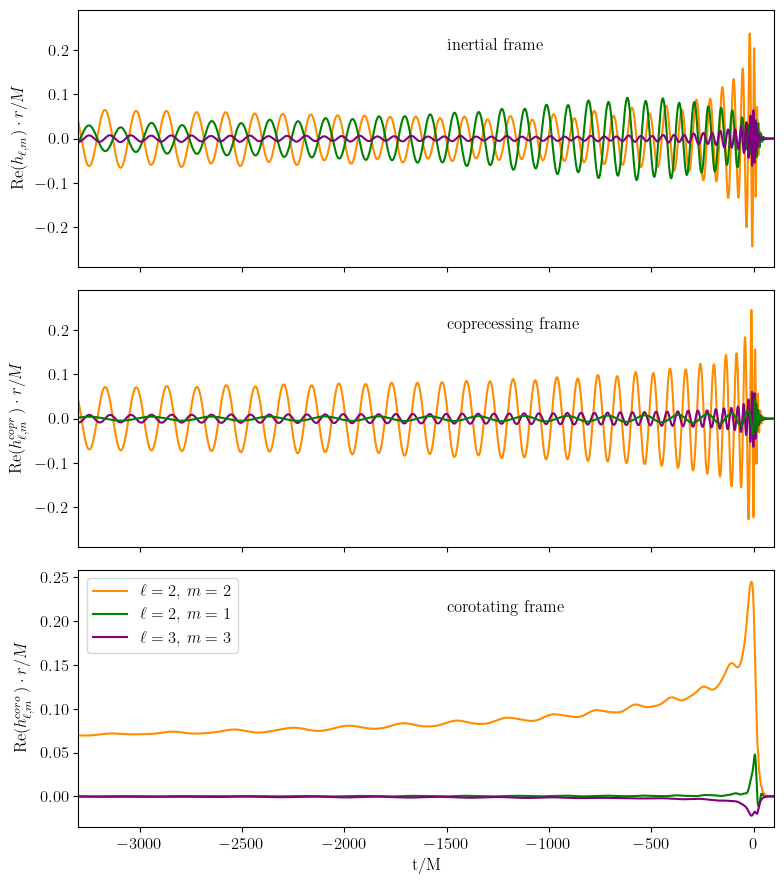

In [4]:
# setup plotting
fig = plt.figure(figsize = (8,9))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312, sharex = ax1)
ax3 = fig.add_subplot(313, sharex = ax1)

# plotting real part in inertial frame
ax1.plot(t, h_iner_22, color='darkorange', label=r'$\ell=2,\,m=2$')
ax1.plot(t, h_iner_21, color='green',label=r'$\ell=2,\,m=1$')
ax1.plot(t, h_iner_33, color='purple',label=r'$\ell=3,\,m=3$')
ax1.tick_params('x', labelbottom=False)
ax1.text(-1500, 0.2, 'inertial frame')

# plotting real part in copreccessing frame
ax2.plot(t, h_copr_22, color='darkorange', label=r'$\ell=2,\,m=2$')
ax2.plot(t, h_copr_33, color='purple',label=r'$\ell=3,\,m=3$')
ax2.plot(t, h_copr_21, color='green',label=r'$\ell=2,\,m=1$')
ax2.tick_params('x', labelbottom=False)
ax2.text(-1500, 0.2, 'coprecessing frame')

# plotting real part in corotating frame
ax3.plot(t, h_coro_22, color='darkorange', label=r'$\ell=2,\,m=2$')
ax3.plot(t, h_coro_21, color='green',label=r'$\ell=2,\,m=1$')
ax3.plot(t, h_coro_33, color='purple',label=r'$\ell=3,\,m=3$')
ax3.text(-1500, 0.21, 'corotating frame')

ax1.set_ylabel('Re$(h_{\ell,m})\cdot r/M$')
ax2.set_ylabel('Re$(h_{\ell,m}^{copr}\,)\cdot r/M$')
ax3.set_ylabel('Re$(h_{\ell,m}^{coro}\,)\cdot r/M$')
ax3.set_xlabel('t/M')
ax3.legend()
ax3.set_xlim(-3300,100)
ax1.set_ylim(-0.29,0.29)
ax2.set_ylim(-0.29,0.29)
#ax3.set_ylim(-0.04,0.26)

fig.tight_layout()
#fig.savefig('strain_in_different_frames.pdf')
plt.show()